<a href="https://colab.research.google.com/github/saritmaitra/mathematical_optimization_model/blob/main/mathematical_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest
from pyforest import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from google.colab import files
import pandas_datareader as web
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
from cvxpy import *

In [3]:
df = pd.read_csv("prices.txt", parse_dates = True, index_col=0)
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2521 entries, 2007-01-02 to 2016-12-06
Data columns (total 53 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGG       2521 non-null   float64
 1   DBC       2521 non-null   float64
 2   DFE       2521 non-null   float64
 3   DIA       2521 non-null   float64
 4   DXJ       2521 non-null   float64
 5   EEM       2521 non-null   float64
 6   EFA       2521 non-null   float64
 7   EWG       2521 non-null   float64
 8   EWH       2521 non-null   float64
 9   EWI       2521 non-null   float64
 10  EWT       2521 non-null   float64
 11  EWU       2521 non-null   float64
 12  EWW       2521 non-null   float64
 13  EWY       2521 non-null   float64
 14  EWZ       2521 non-null   float64
 15  EZU       2521 non-null   float64
 16  FEZ       2521 non-null   float64
 17  FXI       2521 non-null   float64
 18  GDX       2521 non-null   float64
 19  GLD       2521 non-null   float64
 20  IAU       25

In [4]:
df.head(3)

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
2007-01-02,99.91,23.80,65.66,124.47,55.28,38.34,73.51,27.15,16.16,33.42,14.73,47.1,51.70,48.73,46.7,51.95,54.65,38.76,38.43,62.28,6.23,77.64,41.18,141.62,82.38,78.16,83.87,58.63,50.58,106.45,36.38,233.60,62.41,12.56,141.37,49.40,68.50,77.12,69.98,38.95,36.50,34.61,56.58,36.92,35.23,23.33,26.29,36.82,33.50,38.52,47.66,36.64,10001.976
2007-01-03,99.91,23.80,65.66,124.47,55.28,38.34,73.51,27.15,16.16,33.42,14.73,47.1,51.70,48.73,46.7,51.95,54.65,38.76,38.43,62.28,6.23,77.64,41.18,141.62,82.38,78.16,83.87,58.63,50.58,106.45,36.38,233.60,62.41,12.56,141.37,49.40,68.50,77.12,69.98,38.95,36.50,34.61,56.58,36.92,35.23,23.33,26.29,36.82,33.50,38.52,47.66,36.64,10003.944
2007-01-04,100.12,23.18,65.60,124.68,55.95,37.81,73.32,27.06,15.99,33.34,14.78,47.0,51.25,48.19,46.1,51.75,54.62,37.40,37.72,61.65,6.18,78.84,40.79,142.00,82.19,78.37,83.85,58.61,50.75,107.25,34.88,232.72,62.30,12.58,141.67,47.35,68.37,77.22,70.12,38.52,36.31,34.45,55.55,36.80,35.08,23.69,26.33,36.77,33.88,38.51,47.42,36.16,10005.909


In [5]:
df_new = df['2010':]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1755 entries, 2010-01-01 to 2016-12-06
Data columns (total 53 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGG       1755 non-null   float64
 1   DBC       1755 non-null   float64
 2   DFE       1755 non-null   float64
 3   DIA       1755 non-null   float64
 4   DXJ       1755 non-null   float64
 5   EEM       1755 non-null   float64
 6   EFA       1755 non-null   float64
 7   EWG       1755 non-null   float64
 8   EWH       1755 non-null   float64
 9   EWI       1755 non-null   float64
 10  EWT       1755 non-null   float64
 11  EWU       1755 non-null   float64
 12  EWW       1755 non-null   float64
 13  EWY       1755 non-null   float64
 14  EWZ       1755 non-null   float64
 15  EZU       1755 non-null   float64
 16  FEZ       1755 non-null   float64
 17  FXI       1755 non-null   float64
 18  GDX       1755 non-null   float64
 19  GLD       1755 non-null   float64
 20  IAU       17

## Long/short min variance
In this section, we construct a long/short portfolio with the objective of minimising variance. There is a good deal of research that demonstrates that these global-minimum variance (GMV) portfolios outperform mean-variance optimized portfolios.

In [ ]:
pip install PyPortfolioOpt

In [64]:
import pypfopt
from pypfopt import risk_models, expected_returns, plotting, EfficientFrontier, plotting

S = risk_models.CovarianceShrinkage(df_new).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AGG', 0.07483),
             ('DBC', 0.01656),
             ('DFE', 0.00188),
             ('DIA', 0.04385),
             ('DXJ', 0.00475),
             ('EEM', -0.00583),
             ('EFA', 0.00745),
             ('EWG', -0.00071),
             ('EWH', 0.01184),
             ('EWI', -0.00214),
             ('EWT', 0.0023),
             ('EWU', 0.00278),
             ('EWW', 0.00178),
             ('EWY', 0.00139),
             ('EWZ', -0.00293),
             ('EZU', 0.00712),
             ('FEZ', -0.00773),
             ('FXI', -0.00382),
             ('GDX', -0.00357),
             ('GLD', 0.00942),
             ('IAU', 0.00906),
             ('IBB', 0.00554),
             ('ITB', 0.00084),
             ('IVV', 0.04891),
             ('IWD', 0.04144),
             ('IWM', 0.00208),
             ('IYR', 0.00062),
             ('KBE', 0.02077),
             ('KRE', 0.00268),
             ('LQD', 0.03859),
             ('OIL', -0.00154),
             ('SDS', 0.23819),
 

<IPython.core.display.Javascript object>

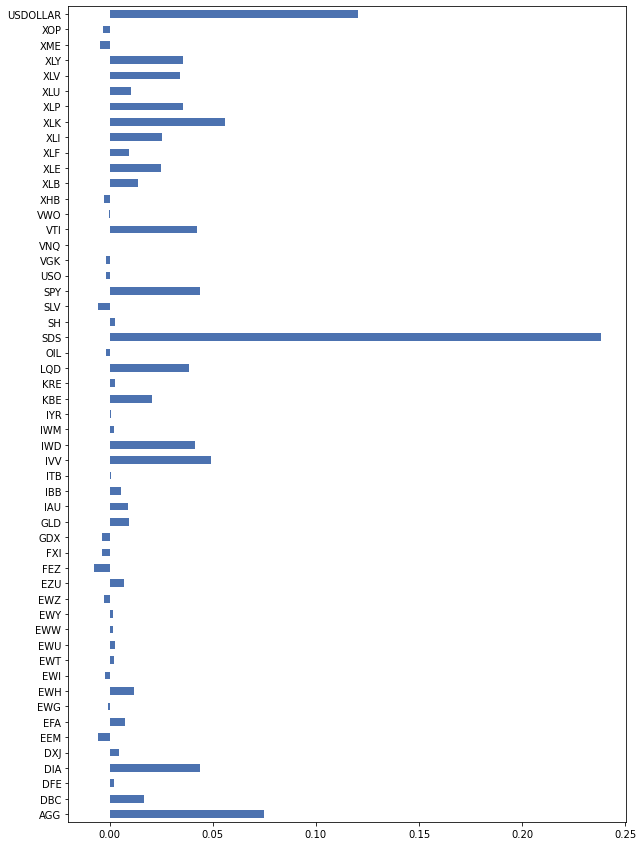

In [13]:
pd.Series(weights).plot.barh(figsize=(10,15));

We can get a quick indication of the portfolio performance as follows. Note that this is an in sample estimate and may have very little resemblance to how the portfolio actually performs!

In [14]:
ef.portfolio_performance(verbose=True);

Annual volatility: 1.7%


Let's say we were happy with this portfolio and wanted to actually go out and buy the shares. To do this, we would need to construct a discrete allocation (unless your broker supports fractional shares!)

If we had \$20,0000 to invest and would like our portfolio to be 130/30 long/short, we can construct the actual allocation as follows:

In [15]:
from pypfopt import DiscreteAllocation

latest_prices = df_new.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $8.77 leftover


{'AGG': 14,
 'DBC': 21,
 'DFE': 1,
 'DIA': 5,
 'DXJ': 2,
 'EEM': -20,
 'EFA': 3,
 'EWG': -3,
 'EWH': 11,
 'EWI': -11,
 'EWT': 2,
 'EWU': 2,
 'EWW': 1,
 'EWY': 1,
 'EWZ': -11,
 'EZU': 5,
 'FEZ': -29,
 'FXI': -13,
 'GDX': -21,
 'GLD': 2,
 'IAU': 16,
 'IBB': 1,
 'ITB': 1,
 'IVV': 5,
 'IWD': 8,
 'IWM': 1,
 'IYR': 1,
 'KBE': 10,
 'KRE': 1,
 'LQD': 7,
 'OIL': -30,
 'SDS': 293,
 'SH': 2,
 'SLV': -45,
 'SPY': 4,
 'USO': -20,
 'VGK': -5,
 'VNQ': 1,
 'VTI': 8,
 'VWO': -2,
 'XHB': -11,
 'XLB': 6,
 'XLE': 7,
 'XLF': 31,
 'XLI': 8,
 'XLK': 23,
 'XLP': 14,
 'XLU': 5,
 'XLV': 10,
 'XLY': 9,
 'XME': -16,
 'XOP': -9}

In [16]:
data = df_new.reset_index()
data.rename(columns = {'index': 'date'}, inplace=True)

# last price for each fund
last_price = data.drop(['date'], axis=1)
last_price = last_price.tail(1).to_numpy()
pd.DataFrame(last_price)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,108.09,15.61,53.56,192.49,49.36,35.6,57.66,25.56,20.83,23.25,30.9,30.67,44.34,53.79,32.68,33.83,32.52,37.26,21.2,111.43,11.26,274.34,27.86,222.99,111.29,134.59,75.52,42.76,54.5,116.64,6.06,15.55,37.1,15.85,221.7,11.29,47.11,81.11,114.68,36.16,34.37,50.43,75.35,23.12,62.88,47.28,50.78,46.77,68.48,82.52,33.18,42.7,10683.036


In [17]:
# weekly returns of last 1 year
wkly_data = data[(data['date'].dt.weekday == 4) & (data['date'] >= '2016-01-01')]
wkly_data = wkly_data.drop(['date'], 1)
wkly_ret = wkly_data.pct_change().dropna()
wkly_ret

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
1529,0.002485,-0.057813,-0.040497,-0.021808,-0.030461,-0.035581,-0.030402,-0.027172,-0.036896,-0.035659,-0.032423,-0.034621,-0.012784,-0.026535,-0.039288,-0.026492,-0.024345,-0.057559,-0.099174,-0.015140,-0.014071,-0.059629,-0.027352,-0.021210,-0.022614,-0.035917,-0.030644,-0.043084,-0.043569,-0.004361,-0.010582,0.038736,0.019856,-0.004511,-0.021415,-0.103061,-0.031872,-0.024400,-0.025620,-0.041333,-0.042820,-0.045182,-0.030330,-0.030769,-0.021521,-0.018708,-0.014688,0.006959,-0.016907,-0.028665,-0.117052,-0.089066,0.000045
1533,-0.000826,0.028192,0.006871,0.006951,0.034785,0.030569,0.022906,0.023275,-0.009577,-0.010450,0.041446,0.026207,0.015628,0.040229,-0.014177,0.025023,0.022393,0.031208,-0.003823,0.008839,0.007612,0.013513,0.019173,0.014570,0.005451,0.012485,0.010065,-0.026066,-0.025368,-0.005257,-0.139037,-0.028718,-0.013717,0.010574,0.014429,0.054608,0.022316,0.011116,0.014142,0.028164,0.017491,0.006797,0.025575,-0.006536,-0.000206,0.026436,0.020497,0.008984,0.014655,0.025315,0.009002,0.052067,0.000044
1538,0.004686,0.030645,0.030610,0.022265,0.031447,0.042278,0.018355,0.006203,0.022184,-0.019496,0.044030,0.032258,0.063750,0.008876,0.096792,0.013122,0.011577,0.015295,0.090560,0.018571,0.017941,-0.072807,0.017140,0.016346,0.025445,0.015685,0.010526,0.027459,0.026029,0.005373,0.060041,-0.035305,-0.017497,0.015695,0.016796,0.040992,0.018154,0.007591,0.015701,0.042611,0.008926,0.006751,0.044313,0.020677,0.027755,0.021298,0.029823,0.036986,-0.020339,0.010913,0.128143,0.076313,0.000064
1543,-0.000274,-0.019562,-0.011540,-0.014784,-0.081791,-0.018319,-0.030101,-0.030004,-0.037841,-0.051367,0.004866,-0.027995,-0.026452,-0.004189,0.011599,-0.029518,-0.032787,-0.047115,0.199859,0.050210,0.051020,-0.040479,-0.055076,-0.029648,-0.022548,-0.047786,-0.026806,-0.032815,-0.037098,-0.006483,-0.060547,0.059012,0.029224,0.055188,-0.029785,-0.076684,-0.027383,-0.019223,-0.031221,-0.017515,-0.045872,0.047459,-0.038997,-0.035451,0.001000,-0.042192,-0.022262,0.025319,-0.031142,-0.053299,0.079080,-0.077571,0.000064
1548,0.004116,-0.002394,-0.036746,-0.012103,-0.088390,-0.022992,-0.028433,-0.020339,0.002892,-0.033188,-0.020178,-0.019424,-0.040756,-0.022507,-0.035892,-0.034140,-0.030381,-0.022200,0.104985,0.053775,0.053839,-0.019708,-0.017834,-0.006884,-0.012583,-0.014790,-0.041958,-0.027632,-0.023229,0.000705,-0.056133,0.011231,0.006211,0.045328,-0.007023,-0.065095,-0.025971,-0.042643,-0.009448,-0.021789,-0.013736,-0.016498,-0.011798,-0.021957,-0.007394,-0.005823,0.008866,-0.021688,-0.000466,-0.005274,0.015989,-0.067352,0.000060
1552,0.000182,-0.004800,0.035168,0.023253,0.037177,0.031378,0.031370,0.033304,0.027105,0.008130,0.042834,0.030738,0.057977,0.003443,0.024302,0.032455,0.028364,0.047816,-0.024416,-0.006590,-0.006700,0.042358,0.029229,0.028686,0.027051,0.039963,0.040518,0.020504,0.019142,0.002379,0.019824,-0.056813,-0.027778,-0.023349,0.028774,0.026411,0.032041,0.043436,0.031157,0.035437,0.041783,0.020280,0.027677,0.023914,0.033219,0.035396,0.015378,0.014047,0.024235,0.042270,0.015738,-0.026928,0.000048
1557,0.001548,0.012058,-0.001727,0.015761,0.036813,-0.005952,0.000556,-0.010046,0.017406,0.014337,0.010269,-0.011928,0.000837,-0.007077,0.010096,-0.004669,-0.001283,-0.001313,0.016866,-0.003997,-0.004216,-0.001299,0.059811,0.016690,0.017632,0.027277,0.024767,0.021149,0.021343,0.010285,0.023758,-0.033967,-0.018141,-0.042350,0.016094,0.026901,-0.006513,0.020947,0.018602,-0.004563,0.043783,0.032147,0.007393,0.016206,0.022019,0.014757,0.004917,-0.000649,0.020780,0.028732,0.032924,0.036059,0.000065
1562,-0.005275,0.044480,0.046145,0.022492,0.045550,0.091816,0.044671,0.038478,0.055188,0.055654,0.060203,0.044266,0.065622,0.074298,0.248876,0.041588,0.045279,0.084484,0.054575,0.029289,0.030483,0.006272,0.039383,0.027173,0.035722,0.0439

In [18]:
# # compute correlation matrix
# plt.figure(figsize=(20,30))
# my_cmap = sns.diverging_palette(10, 220, sep=80, n=50)
# sns.heatmap(wkly_ret.corr(), annot=True, fmt=".02f", cmap=my_cmap);

In [19]:
# # weekly returns of last 1 year
# wkly_data = data[(data['date'].dt.weekday == 4) & (data['date'] >= '2016-01-01')]
# wkly_data = wkly_data.drop(['date'], 1)
# wkly_ret = wkly_data.pct_change().dropna()

# expected return and covariance matrix
sigma = wkly_ret.cov().to_numpy()
mu = wkly_ret.mean().to_numpy()
# asset SDs
asset_vols = np.sqrt(sigma)

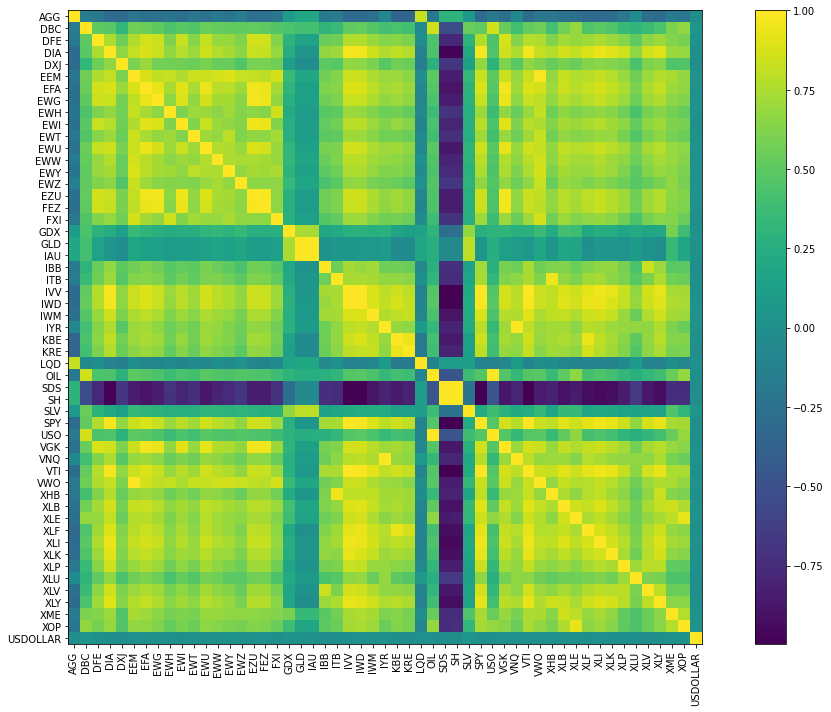

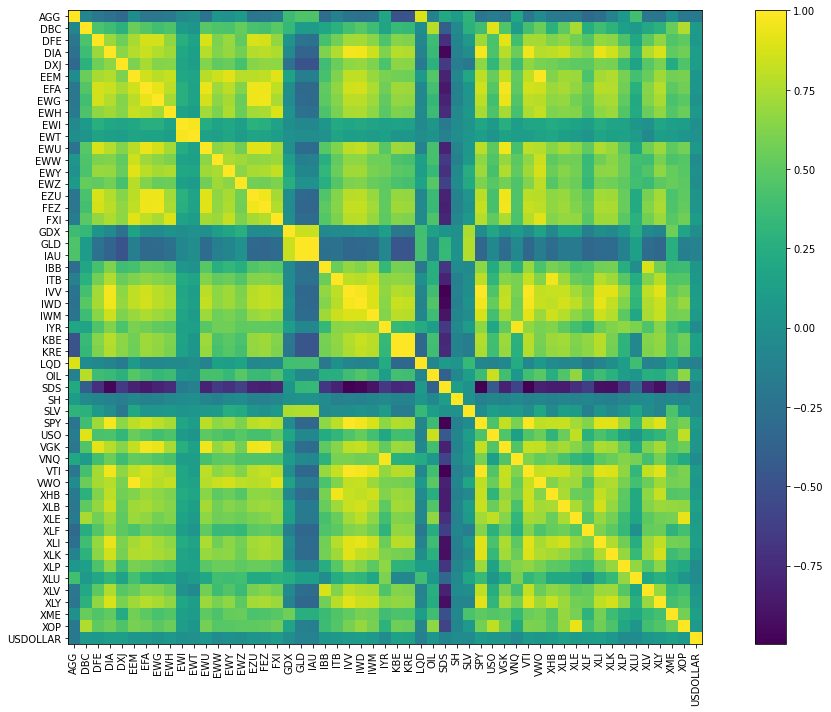

In [22]:
past_df, future_df = df_new.iloc[:-250], df_new.iloc[-250:]
cov_future_df = risk_models.sample_cov(future_df)
cov_past_df = risk_models.sample_cov(past_df)
plt.rcParams["figure.figsize"] = (15,10)
plotting.plot_covariance(cov_past_df, plot_correlation=True)
plotting.plot_covariance(cov_future_df, plot_correlation=True)

plt.show()

We can see that visually, the sample covariance does not capture some of the new features of the covariance matrix, for example the highly correlated group of FAANG stocks. We may be able to improve this by using an exponentially-weighted covariance matrix, which gives more weight to recent data. We can also look at how each model predicts future variance.

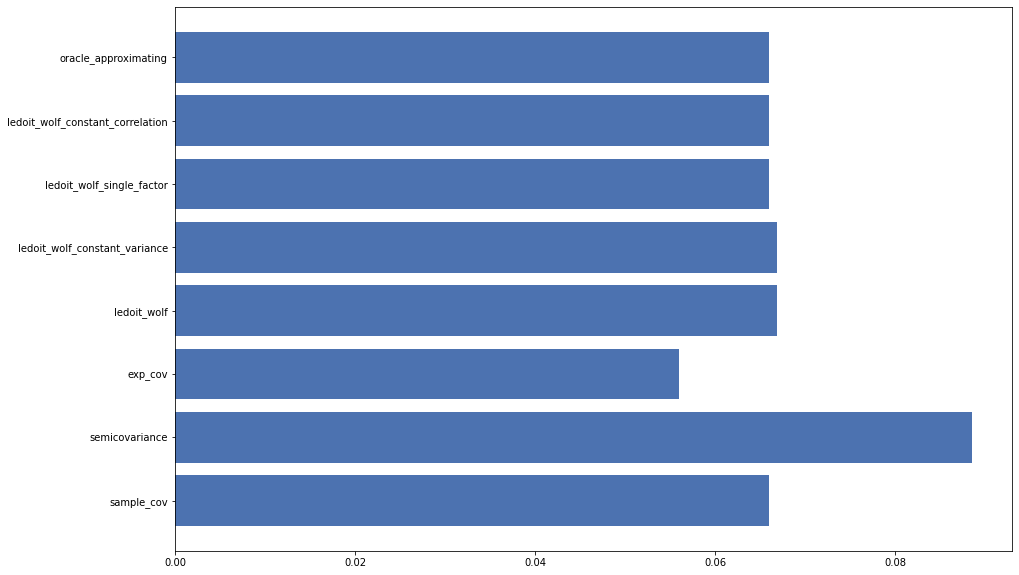

In [69]:
future_variance = np.diag(cov_future_df)
mae = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df_new, method=method)
    variance = np.diag(S)
    mae.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mae))
plt.barh(xrange,mae)
plt.yticks(xrange, risk_methods)
plt.show()


We can see that the exponential covariance matrix is a much better estimator of future variance compared to the other models. Its mean absolute error is 2%, which is actually pretty good. Let's visually compare the exponential cov matrix to the realised future cov matrix:

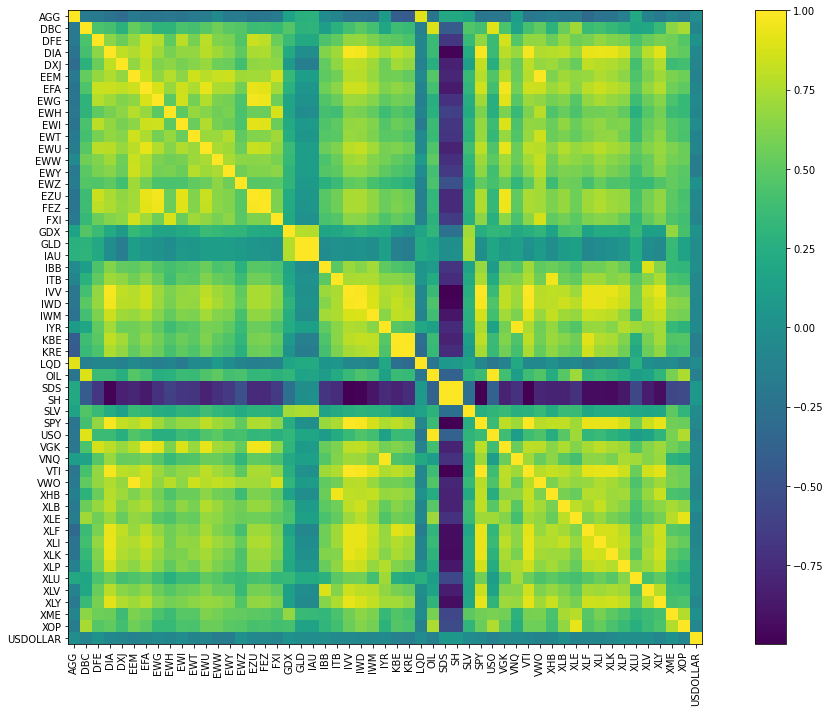

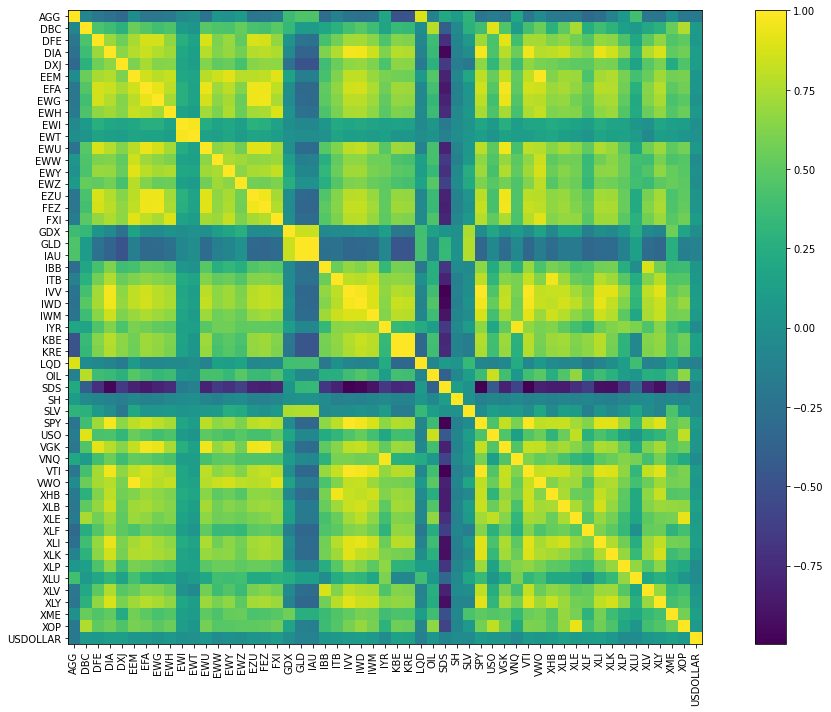

In [25]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(cov_future_df, plot_correlation=True)
plt.show()

## Returns
What about returns? Will the exponentially-weighted returns similarly be the best performer?

[0.0659507732267393, 0.08850388277550506, 0.05599414164840363, 0.06685090529430797, 0.06685090529430797, 0.06595661917735586, 0.0659507732267393, 0.06601037839142357]


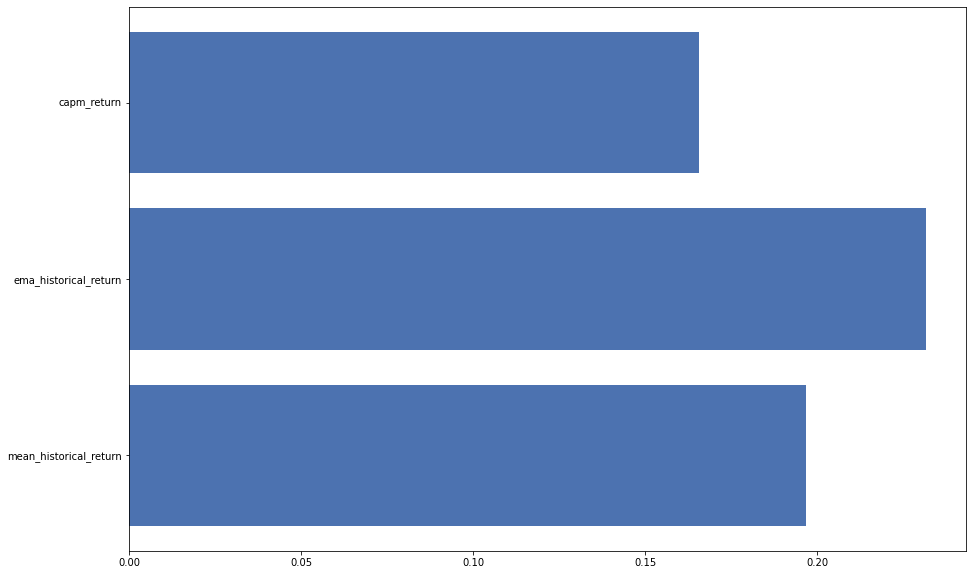

In [26]:
print(mae)
future_rets = expected_returns.mean_historical_return(future_df)
mae = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mae.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mae))
plt.barh(xrange, mae)
plt.yticks(xrange, return_methods)
plt.show()

The exponential moving average is marginally better than the others, but the improvement is almost unnoticeable. We also note that the mean absolute deviations are above 15%, meaning that if your expected annual returns are 10%, on average the realised annual return could be anywhere from a 5% loss to a 30% gain. This is a massive range, and gives some context to the advice in the docs suggesting that you optimize without providing an estimate of returns.

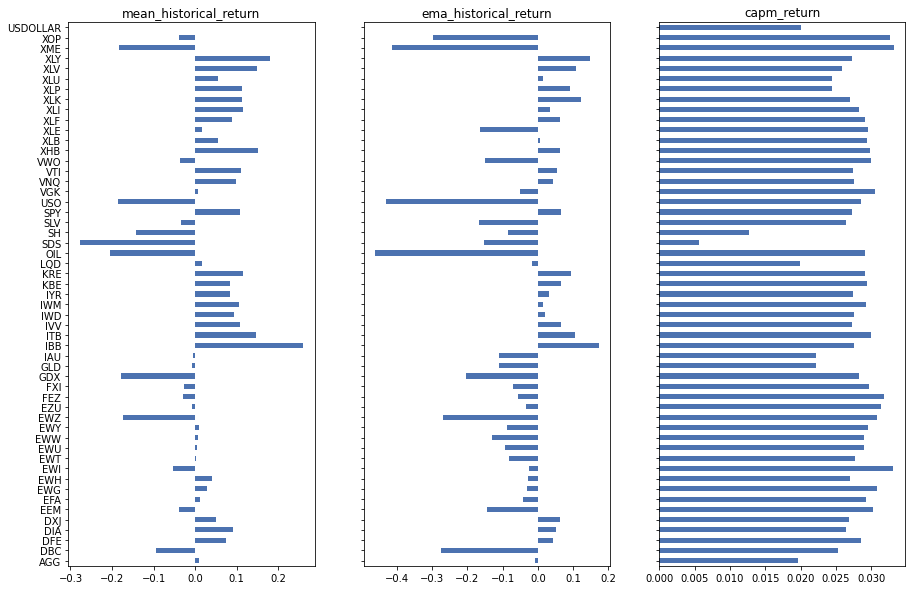

In [27]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))
for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

The good news is that we see a good degree of agreement (apart from the ema method).

In [28]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_new)
S = risk_models.sample_cov(df_new)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AGG', 0.0), ('DBC', 0.0), ('DFE', 0.0), ('DIA', 0.0), ('DXJ', 0.0), ('EEM', 0.0), ('EFA', 0.0), ('EWG', 0.0), ('EWH', 0.0), ('EWI', 0.0), ('EWT', 0.00512), ('EWU', 0.0), ('EWW', 0.0), ('EWY', 0.0), ('EWZ', 0.0), ('EZU', 0.0), ('FEZ', 0.0), ('FXI', 0.0), ('GDX', 0.0), ('GLD', 0.0), ('IAU', 0.0), ('IBB', 0.18368), ('ITB', 0.0), ('IVV', 0.0), ('IWD', 0.0), ('IWM', 0.0), ('IYR', 0.0), ('KBE', 0.0), ('KRE', 0.0), ('LQD', 0.05788), ('OIL', 0.0), ('SDS', 0.0), ('SH', 0.05376), ('SLV', 0.0), ('SPY', 0.0), ('USO', 0.0), ('VGK', 0.0), ('VNQ', 0.0), ('VTI', 0.0), ('VWO', 0.0), ('XHB', 0.0), ('XLB', 0.0), ('XLE', 0.0), ('XLF', 0.0), ('XLI', 0.0), ('XLK', 0.0), ('XLP', 0.09242), ('XLU', 0.0), ('XLV', 0.0), ('XLY', 0.60714), ('XME', 0.0), ('XOP', 0.0), ('USDOLLAR', 0.0)])
Expected annual return: 13.9%
Annual volatility: 14.0%
Sharpe Ratio: 0.85


(0.13871685700118178, 0.14027954052740446, 0.8462877519761316)

In [29]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


latest_prices = get_latest_prices(df_new)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'XLY': 73, 'IBB': 7, 'XLP': 18, 'LQD': 5, 'SH': 14, 'EWT': 1}
Funds remaining: $8.12


In [30]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.efficient_return(target_return=0.2, market_neutral=True)

OrderedDict([('AGG', 0.6704610040315248),
             ('DBC', 0.058465677784948),
             ('DFE', 0.1225326118250124),
             ('DIA', -0.3022153631493923),
             ('DXJ', -0.0278732162683197),
             ('EEM', -0.2023639819340016),
             ('EFA', -0.0393410912202734),
             ('EWG', 0.0844439715481004),
             ('EWH', 0.1234047206814441),
             ('EWI', -0.045189367732899),
             ('EWT', 0.055520762362951),
             ('EWU', -0.1523339001597088),
             ('EWW', -0.0057137806597392),
             ('EWY', 0.0470884095351778),
             ('EWZ', 0.0135826941427633),
             ('EZU', -0.0462149813914054),
             ('FEZ', -0.194537352656675),
             ('FXI', -0.0208275469641088),
             ('GDX', -0.0353864397050433),
             ('GLD', -0.0675433917864828),
             ('IAU', 0.1903677419462555),
             ('IBB', 0.0519053333978785),
             ('ITB', 0.0190623641704773),
             ('IVV', -0.71

## Minimise risk for a given return, market-neutral
We may instead be in the situation where we have a certain required rate of return (maybe we are a pension fund that needs 7% return a year), but would like to minimise risk. Additionally, suppose we would like our portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides.

In [31]:
from pypfopt import objective_functions
mu = expected_returns.capm_return(df_new)
sigma = risk_models.CovarianceShrinkage(df_new).ledoit_wolf()


# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, sigma, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AGG', -0.14968),
             ('DBC', -0.0342),
             ('DFE', 0.02274),
             ('DIA', -0.02034),
             ('DXJ', -0.00562),
             ('EEM', 0.05849),
             ('EFA', 0.03452),
             ('EWG', 0.06224),
             ('EWH', -0.00558),
             ('EWI', 0.13216),
             ('EWT', 0.03656),
             ('EWU', 0.03388),
             ('EWW', 0.03727),
             ('EWY', 0.04505),
             ('EWZ', 0.08256),
             ('EZU', 0.07231),
             ('FEZ', 0.07964),
             ('FXI', 0.04875),
             ('GDX', 0.03327),
             ('GLD', -0.09581),
             ('IAU', -0.09574),
             ('IBB', 0.00622),
             ('ITB', 0.04648),
             ('IVV', -0.00621),
             ('IWD', 0.00072),
             ('IWM', 0.03208),
             ('IYR', -0.00225),
             ('KBE', 0.03521),
             ('KRE', 0.03125),
             ('LQD', -0.1431),
             ('OIL', 0.04778),
             ('SDS', -0.4176),


In [32]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 46.2%
Sharpe Ratio: 0.11


The resulting portfolio still has a volatility of > than our 15% limit. It's in-sample Sharpe ratio has gone down, but this portfolio is a lot more robust for actual investment.

<IPython.core.display.Javascript object>

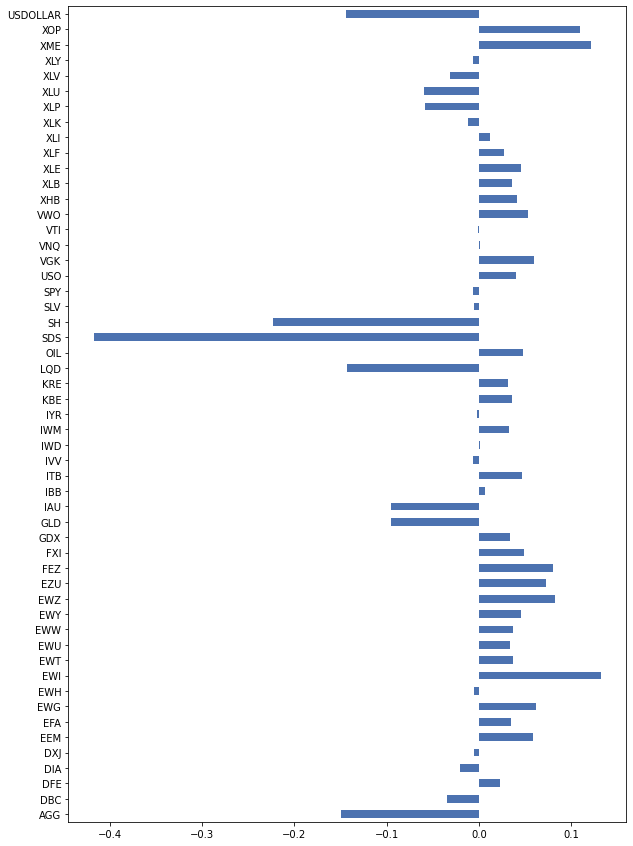

In [33]:
pd.Series(weights).plot.barh(figsize=(10,15));

Expected annual return: 0.0%
Annual volatility: 0.0%
Sharpe Ratio: -1806.13


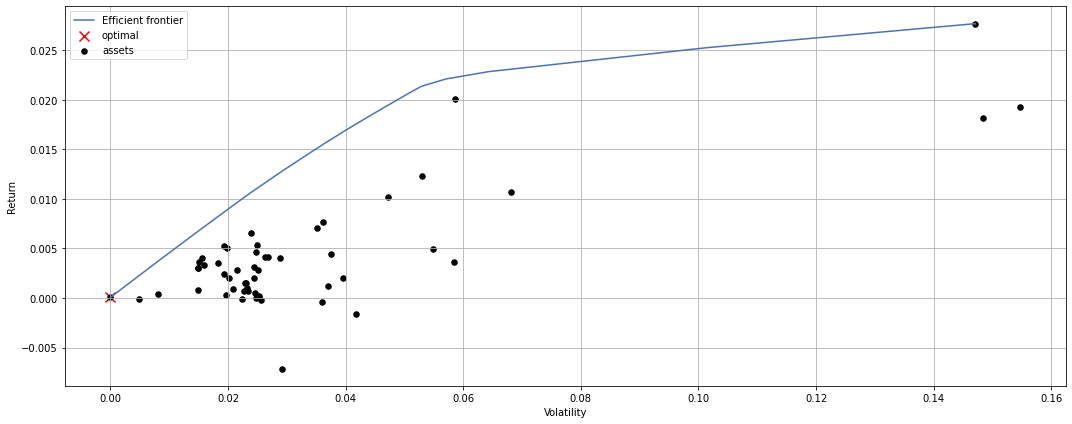

In [72]:
from pypfopt import CLA, plotting

plt.figure(figsize = (15,6))
cla = CLA(mu, sigma)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);
ax = plotting.plot_efficient_frontier(cla, showfig=False)
plt.grid(True)

In [36]:
import cvxpy as cp 
# number of assets
n = sigma.shape[0]
print(n)
# variable to optimize over - portfolio weights
w = cp.Variable(n)

53


In [42]:
# ret = mu.T @ w 
# # volatility
# vol = cp.quad_form(w, sigma)


sigma = np.cov(wkly_ret.transpose())
# number of assets
n = sigma.shape[0]
# average returns
mu = wkly_ret.mean().values
# asset SDs
asset_vols = np.sqrt(sigma)
# variable to optimize over - portfolio weights
w = cp.Variable(n)
# objectives to optimize portfolio return
ret = mu.T @ w 
# volatility
vol = cp.quad_form(w, sigma)
prob = cp.Problem(cp.Minimize(vol),  # minimize volatility
                  [cp.sum(w) == 1,   # sum of weights = 1
                   w >= 0]           # weights > 0 (long-only)
                 )
prob.solve()
wts = [float('%0.4f' % v) for v in w.value]
minvol = vol.value

labels = list(wkly_ret.columns)
print(labels); print()
z = pd.DataFrame([mu, asset_vols[0]], columns=labels)
z['rows'] = ['real return', 'vol']
z.set_index('rows')

['AGG', 'DBC', 'DFE', 'DIA', 'DXJ', 'EEM', 'EFA', 'EWG', 'EWH', 'EWI', 'EWT', 'EWU', 'EWW', 'EWY', 'EWZ', 'EZU', 'FEZ', 'FXI', 'GDX', 'GLD', 'IAU', 'IBB', 'ITB', 'IVV', 'IWD', 'IWM', 'IYR', 'KBE', 'KRE', 'LQD', 'OIL', 'SDS', 'SH', 'SLV', 'SPY', 'USO', 'VGK', 'VNQ', 'VTI', 'VWO', 'XHB', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XME', 'XOP', 'USDOLLAR']



<IPython.core.display.Javascript object>

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
rows,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
real return,-0.000117,0.004613,-0.000031,0.003614,0.002069,0.004135,0.000907,0.000668,0.002795,0.019219,0.027677,0.00052,-0.000413,0.003147,0.012358,0.000215,-0.000194,0.004005,0.010691,0.001551,0.001564,-0.001572,0.002787,0.003068,0.004025,0.005344,0.000749,0.007111,0.007696,0.000363,0.003615,-0.007115,0.018156,0.004478,0.003049,0.004936,-0.00011,0.000965,0.003291,0.004165,0.002023,0.005013,0.00658,0.00124,0.005272,0.003484,0.000787,0.001987,0.000313,0.002382,0.020065,0.010237,0.000059
vol,0.004857,NaN,NaN,NaN,NaN,0.004528,NaN,NaN,0.002433,NaN,NaN,NaN,0.007799,0.005007,0.006158,0.000704,NaN,NaN,0.013679,0.007964,0.007892,NaN,NaN,NaN,NaN,NaN,0.005917,NaN,NaN,0.005858,NaN,0.004321,0.012091,0.009405,NaN,NaN,NaN,0.006133,NaN,0.004164,NaN,NaN,NaN,NaN,NaN,NaN,0.005529,0.007117,NaN,NaN,0.001075,NaN,NaN


In [44]:
import cvxpy as cp 

%time
# optimization variable and parameters
x = cp.Variable(shape = wkly_ret.shape[1], integer=True)
threshold = cp.Parameter(nonneg=True) # maximum portfolio variance
k = cp.Parameter(nonneg=True) # maximum allocation into one fund

# portfolio mean and variance
mean = mu.T*x
variance = cp.quad_form(x, sigma)
objective = cp.Maximize(mean) # objective function

# constraints
constraints = [x >= 0, variance <= threshold]
for pi in last_price:
    constraints = constraints + [pi*x <= k] # upper bound on single-fund allocation
prob = cp.Problem(objective, constraints)

# Solving optimization problem for each parameter combination
z_values = []
k_values = np.arange(1000, 5000, 1000)
threshold_values = np.arange(1, 5.5, 0.5)
for threshold_value in threshold_values:
    for k_value in k_values:
        threshold.value = threshold_value
        k.value = k_value
        prob.solve()
        if prob.status != 'optimal': continue
        counts = x.value.round()
        investments = last_price*counts
        returns = mu@investments[0]
        z_values.append(returns)

# The optimal objective 
prob.solve()  # Returns the optimal value.
print("status:", prob.status); print()
print("optimal value", prob.value); print()
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
status: optimal

optimal value 0.9822826057876909

A dual solution corresponding to the inequality constraints is
None


In [ ]:
optimal_funds = (df_new.columns).values[np.where(counts > 0)]
Funds = pd.DataFrame(optimal_funds)
Funds.rename(columns = {0: 'PortfolioName'}, inplace=True)
Counts = pd.DataFrame(counts_optimal)
Counts.rename(columns = {0: 'Counts'}, inplace=True) 
prices_optimal = np.around(last_price, 2)[0][np.where(counts > 0)]
Prices = pd.DataFrame(prices_optimal)
Prices.rename(columns = {0: 'OptimalPrices'}, inplace=True)
investments_optimal = np.around(investments, 2)[investments > 0]
Investments = pd.DataFrame(investments_optimal)
Investments.rename(columns = {0: 'OptimalInvestments'}, inplace=True)
print(pd.concat([Funds, Counts, Prices, Investments], 1)); print()
print('Capital=>', capital_optimal); 
risk_optimal = np.around(counts.T@sigma@counts, 2)
print('Risk=>', risk_optimal)
return_optimal = np.around(52*returns/capital_optimal, 3)
print('Return=>', return_optimal); print()

In [ ]:
# Funds = pd.DataFrame(optimal_funds)
# Funds.rename(columns = {0: 'PortfolioName'}, inplace=True)
# Counts = pd.DataFrame(counts_optimal)
# Counts.rename(columns = {0: 'Counts'}, inplace=True)
# Prices = pd.DataFrame(prices_optimal)
# Prices.rename(columns = {0: 'OptimalPrices'}, inplace=True)
# Investments = pd.DataFrame(investments_optimal)
# Investments.rename(columns = {0: 'OptimalInvestments'}, inplace=True)
# pd.concat([Funds, Counts, Prices, Investments], 1)

In [49]:
# expected return and covariance matrix
# sigma = week_ret.cov().to_numpy()
# mu = week_ret.mean().to_numpy()

sigma = np.cov(wkly_ret.transpose())
# number of assets
n = sigma.shape[0]
# average returns
mu = wkly_ret.mean().values
# asset SDs
asset_vols = np.sqrt(sigma)
# variable to optimize over - portfolio weights
w = cp.Variable(n)
# objectives to optimize
# portfolio return
ret = mu.T @ w 
# volatility
vol = cp.quad_form(w,sigma)

prob = cp.Problem(cp.Minimize(vol),  # minimize volatility
                  [cp.sum(w) == 1,   # sum of weights = 1
                   w >= 0]           # weights > 0 (long-only)
                 )
prob.solve()
wts = [float('%0.4f' % v) for v in w.value]
minvol = vol.value

labels = list(wkly_ret.columns)
print(labels); print()
z = pd.DataFrame([mu, asset_vols[0]], columns=labels)
z['rows'] = ['real return', 'vol']
z.set_index('rows')

['AGG', 'DBC', 'DFE', 'DIA', 'DXJ', 'EEM', 'EFA', 'EWG', 'EWH', 'EWI', 'EWT', 'EWU', 'EWW', 'EWY', 'EWZ', 'EZU', 'FEZ', 'FXI', 'GDX', 'GLD', 'IAU', 'IBB', 'ITB', 'IVV', 'IWD', 'IWM', 'IYR', 'KBE', 'KRE', 'LQD', 'OIL', 'SDS', 'SH', 'SLV', 'SPY', 'USO', 'VGK', 'VNQ', 'VTI', 'VWO', 'XHB', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XME', 'XOP', 'USDOLLAR']



<IPython.core.display.Javascript object>

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
rows,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
real return,-0.000117,0.004613,-0.000031,0.003614,0.002069,0.004135,0.000907,0.000668,0.002795,0.019219,0.027677,0.00052,-0.000413,0.003147,0.012358,0.000215,-0.000194,0.004005,0.010691,0.001551,0.001564,-0.001572,0.002787,0.003068,0.004025,0.005344,0.000749,0.007111,0.007696,0.000363,0.003615,-0.007115,0.018156,0.004478,0.003049,0.004936,-0.00011,0.000965,0.003291,0.004165,0.002023,0.005013,0.00658,0.00124,0.005272,0.003484,0.000787,0.001987,0.000313,0.002382,0.020065,0.010237,0.000059
vol,0.004857,NaN,NaN,NaN,NaN,0.004528,NaN,NaN,0.002433,NaN,NaN,NaN,0.007799,0.005007,0.006158,0.000704,NaN,NaN,0.013679,0.007964,0.007892,NaN,NaN,NaN,NaN,NaN,0.005917,NaN,NaN,0.005858,NaN,0.004321,0.012091,0.009405,NaN,NaN,NaN,0.006133,NaN,0.004164,NaN,NaN,NaN,NaN,NaN,NaN,0.005529,0.007117,NaN,NaN,0.001075,NaN,NaN


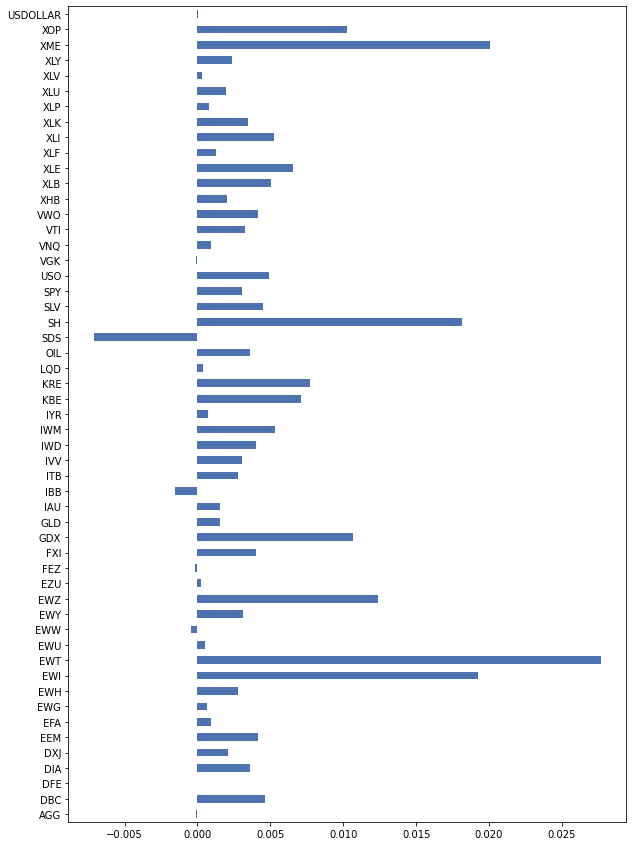

In [50]:
wkly_ret.mean().plot.barh(figsize=(10,15));

In [51]:
# Solve max return portfolio (corner solution)
prob = cp.Problem(cp.Maximize(ret),  # maximize return
                  [cp.sum(w) == 1, 
                   w >= 0]
                 )
prob.solve()
wts = [float('%0.4f' % v) for v in w.value]
maxretvol = vol.value

print("Max return portfolio weights")
pd.DataFrame([wts], columns=labels)

Max return portfolio weights


<IPython.core.display.Javascript object>

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# solve min vol portfolio (other corner solution)
prob = cp.Problem(cp.Minimize(vol),
                  [cp.sum(w) == 1, 
                   w >= 0]
                 )
prob.solve()
# round to not get x.xxxxE-22
wts = [float('%0.6f' % v) for v in w.value]

minvol = vol.value
minvolret = ret.value
print("Min vol portfolio weights")
pd.DataFrame([wts], columns=labels)

Min vol portfolio weights


<IPython.core.display.Javascript object>

,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
0,0.00008,0.0,0.0,-0.0,0.000058,0.000001,0.0,0.000041,0.000001,0.000003,0.000004,-0.0,-0.0,0.000001,0.000002,0.0,-0.0,0.000001,0.000002,0.0,0.0,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000035,0.001101,0.00002,0.000131,0.0,0.000001,-0.0,0.00003,0.0,0.000001,-0.0,0.0,0.000099,0.0,0.000266,0.000555,0.00007,0.0,0.000402,0.000418,0.000002,0.000001,0.996647


In [54]:
%%time
# solve points in between
# maximize return subject to volatility constraints between minimum volatility and max return volatility

# specify a Parameter variable instead of creating new Problem at each iteration
# this allows the solver to reuse previous work
vol_limit = cp.Parameter(nonneg=True)

prob = cp.Problem(cp.Maximize(ret),
                  [cp.sum(w) == 1, 
                   w >= 0,
                   vol <= vol_limit   # new constraint: vol <= vol_limit parameter
                  ]
                 )

# define helper function 
def solve_vl(vl_val):
    vol_limit.value = vl_val
    result = prob.solve()
    return (ret.value, np.sqrt(vol.value), w.value)

# number of points on the frontier
NPOINTS = 200
vl_vals = np.linspace(minvol, maxretvol, NPOINTS)

# iterate over vl_vals
results_dict = {}
for vl_val in vl_vals:
    results_dict[vl_val] = solve_vl(vl_val)

ret_frame = pd.DataFrame(enumerate(results_dict.keys()))
ret_frame.columns=['i', 'vol']
ret_frame['return'] = [results_dict[v][0] for v in ret_frame['vol']]
ret_frame['std'] = [results_dict[v][1] for v in ret_frame['vol']]
for i, colname in enumerate(labels):
    ret_frame[colname]=[results_dict[v][2][i] for v in ret_frame['vol']]
ret_frame.head()

<IPython.core.display.Javascript object>

CPU times: user 2.44 s, sys: 105 ms, total: 2.54 s
Wall time: 2.46 s


In [55]:
ret_frame.head()

,i,vol,return,std,AGG,DBC,DFE,DIA,DXJ,EEM,EFA,EWG,EWH,EWI,EWT,EWU,EWW,EWY,EWZ,EZU,FEZ,FXI,GDX,GLD,IAU,IBB,ITB,IVV,IWD,IWM,IYR,KBE,KRE,LQD,OIL,SDS,SH,SLV,SPY,USO,VGK,VNQ,VTI,VWO,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,USDOLLAR
0,0,1.262822e-10,0.000060,0.000011,3.361286e-04,5.350018e-07,1.467551e-07,1.366320e-06,3.654973e-05,1.762662e-07,7.439693e-07,2.242373e-06,1.846171e-07,3.545316e-07,0.000005,2.793653e-07,2.404503e-07,1.716636e-07,1.578130e-06,6.117887e-07,6.911951e-07,1.566107e-07,8.531178e-08,1.780581e-05,4.804498e-05,2.093500e-07,1.268739e-06,4.374928e-06,1.262130e-06,1.804804e-06,1.394210e-06,3.076882e-07,3.423649e-07,1.526215e-06,3.101115e-06,0.000593,0.000010,8.749853e-05,1.536843e-06,4.769820e-06,2.828977e-07,1.649738e-05,1.288626e-06,1.741758e-07,4.116458e-07,3.201896e-07,0.000151,1.471993e-07,0.000182,0.000391,1.237061e-06,3.730784e-07,2.743116e-04,9.593696e-05,9.125865e-08,1.284028e-07,9.977193e-01
1,1,1.087304e-04,0.004754,0.010427,1.632114e-09,2.447993e-10,4.268042e-11,1.007794e-09,7.471526e-11,6.530354e-11,5.436472e-11,5.284130e-11,8.744175e-11,3.333312e-11,0.029310,4.246810e-11,3.693949e-11,6.475819e-11,1.880468e-10,4.255969e-11,3.973630e-11,6.482139e-11,4.018677e-02,4.441873e-10,4.733559e-10,5.677529e-11,1.568797e-10,3.492812e-10,5.049248e-10,1.902988e-09,9.855036e-11,9.398086e-10,2.081627e-02,1.054679e-09,8.117091e-11,0.177382,0.019744,2.240010e-10,3.434543e-10,5.752163e-11,4.256234e-11,1.262654e-10,3.181247e-10,6.497800e-11,1.036976e-10,5.162561e-10,0.200659,7.828204e-11,0.150754,0.307888,1.220456e-10,5.305601e-10,1.846875e-10,1.815321e-10,5.325983e-02,1.396568e-10,4.755114e-09
2,2,2.174607e-04,0.006660,0.014747,3.609301e-10,9.174409e-11,1.696945e-11,2.715833e-10,2.897465e-11,2.497639e-11,2.056747e-11,1.996510e-11,3.384079e-11,1.228674e-11,0.043496,1.637425e-11,1.426079e-11,2.474108e-11,6.045948e-11,1.606678e-11,1.503699e-11,2.497021e-11,5.186566e-02,1.426544e-10,1.498989e-10,2.028109e-11,5.642058e-11,1.146621e-10,1.556803e-10,3.535205e-10,3.380293e-11,3.498261e-10,1.850499e-02,2.339931e-10,3.340379e-11,0.106310,0.027258,6.481573e-11,1.140437e-10,2.299058e-11,1.625276e-11,4.179323e-11,1.064950e-10,2.499110e-11,3.825731e-11,2.002573e-10,0.259163,3.243759e-11,0.115094,0.294445,4.532883e-11,1.312798e-10,5.677473e-11,6.206065e-11,8.386278e-02,5.413572e-11,6.777972e-10
3,3,3.261910e-04,0.008111,0.018061,2.417519e-07,6.011851e-08,1.250522e-08,1.801561e-07,2.039733e-08,1.799816e-08,1.477092e-08,1.438119e-08,2.382179e-08,8.682620e-09,0.054300,1.200257e-08,1.070024e-08,1.765211e-08,4.600720e-08,1.183426e-08,1.111924e-08,1.806505e-08,6.077041e-02,8.730916e-08,9.192579e-08,1.429694e-08,3.874392e-08,7.700806e-08,1.049516e-07,2.313535e-07,2.344565e-08,2.934995e-07,1.672900e-02,1.521871e-07,2.208810e-08,0.052180,0.032979,4.067877e-08,7.641046e-08,1.581556e-08,1.192365e-08,2.873437e-08,7.140006e-08,1.798194e-08,2.637929e-08,1.421944e-07,0.303681,2.191073e-08,0.087978,0.284220,3.040153e-08,8.549556e-08,3.639738e-08,4.169856e-08,1.071593e-01,3.708615e-08,4.973415e-07
4,4,4.349213e-04,0.009331,0.020855,2.122749e-07,5.931933e-08,1.121160e-08,1.596537e-07,1.864352e-08,1.620438e-08,1.335181e-08,1.298747e-08,2.163044e-08,8.134236e-09,0.063378,1.073160e-08,9.527414e-09,1.601543e-08,4.280890e-08,1.060917e-08,9.938453e-09,1.625287e-08,6.822280e-02,8.711748e-08,9.167377e-08,1.262222e-08,3.507681e-08,6.957681e-08,9.510247e-08,1.929002e-07,2.171213e-08,2.246641e-07,1.525414e-02,1.408933e-07,2.222578e-08,0.006718,0.037790,4.054572e-08,6.890977e-08,1.520474e-08,1.066606e-08,2.686495e-08,6.453291e-08,1.619604e-08,2.391075e-08,1.316406e-07,0.341155,2.019900e-08,0.065094,0.275613,2.815627e-08,8.338862e-08,3.359214e-08,3.784813e-08,1.267725e-01,3.493300e-08,3.742626e-07


In [56]:
ret_frame = pd.DataFrame(enumerate(results_dict.keys()))
ret_frame.columns=['i', 'var']
ret_frame['return'] = [results_dict[v][0] for v in ret_frame['var']]
ret_frame['std'] = [results_dict[v][1] for v in ret_frame['var']]
ret_frame

<IPython.core.display.Javascript object>

,i,var,return,std
0,0,1.262822e-10,0.000060,0.000011
1,1,1.087304e-04,0.004754,0.010427
2,2,2.174607e-04,0.006660,0.014747
3,3,3.261910e-04,0.008111,0.018061
4,4,4.349213e-04,0.009331,0.020855
5,5,5.436516e-04,0.010392,0.023316
6,6,6.523819e-04,0.011323,0.025542
7,7,7.611122e-04,0.012155,0.027588
8,8,8.698425e-04,0.012914,0.029493
9,9,9.785727e-04,0.013617,0.031282


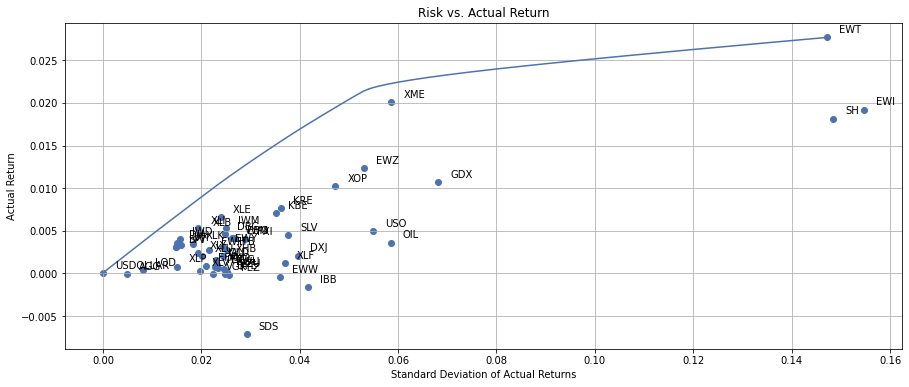

In [59]:
def eff_frontier(ret_frame, week_ret,
                   xlabel="Standard Deviation of Actual Returns",
                   ylabel="Actual Return",
                   title=None):

    sigma = np.cov(wkly_ret.transpose())
    n = sigma.shape[0]
    mu = wkly_ret.mean().values
    asset_vols = np.sqrt(sigma.diagonal())

    plt.figure(figsize=(15, 6))
    plt.grid(True)

    # plot the data
    plt.plot(ret_frame['std'], ret_frame['return'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Risk vs. Actual Return")

    # plot the markers
    plt.scatter(asset_vols, mu)
    xoffset = 0.0025
    yoffset = 0.0015
    labels = df.columns
    for i, label in enumerate(labels):
        plt.annotate(label, xy=(asset_vols[i]+xoffset, mu[i]+yoffset),  xycoords='data',
                     horizontalalignment='left', verticalalignment='top',
                    )
        
eff_frontier(ret_frame, wkly_ret)


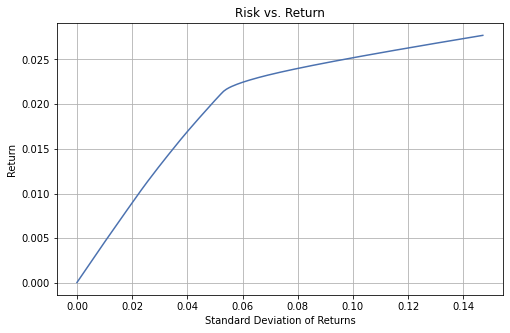

In [61]:
# plot frontier
plt.figure(figsize=(8, 5))
# plt.scatter(asset_vols, mu)

x = ret_frame['std']
y = ret_frame['return']
plt.xlabel("Standard Deviation of Returns")
plt.ylabel("Return"); plt.grid(True)
plt.title("Risk vs. Return")

# plot the data
plt.plot(x,y);